# EDA

In [1]:
import pandas as pd

X_train = pd.read_csv("../data/processed/splits/X_train.csv")
X_test = pd.read_csv('../data/processed/splits/X_test.csv')

data = pd.read_csv("../data/interim/dataset.csv")
fake = pd.read_csv("../data/raw/Fake.csv")
true = pd.read_csv("../data/raw/True.csv")

df = data.copy()
df.head()

,title,text,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0


In [29]:
df.iloc[40000][1]

C:\Users\sheha\AppData\Local\Temp\ipykernel_9176\2064293468.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.iloc[40000][1]


'LONDON (Reuters) - British Prime Minister Theresa May expects a Brexit deal to be agreed in enough time for lawmakers to vote on it before March 2019, her spokeswoman said, addressing earlier contradictory remarks from her Brexit minister.  It is our intention and full expectation that we will secure a deal in good time before we leave and that MPs (Members of Parliament) will vote on it before we leave,  the spokeswoman said. When asked, she said May had full confidence in Brexit minister David Davis.  '

In [2]:
X_train.shape

(35918, 2)

In [3]:
df.shape

(44898, 3)

In [4]:
fake.shape

(23481, 4)

In [5]:
true.shape

(21417, 4)

In [6]:
df.isna().sum()

title    0
text     0
label    0
dtype: int64

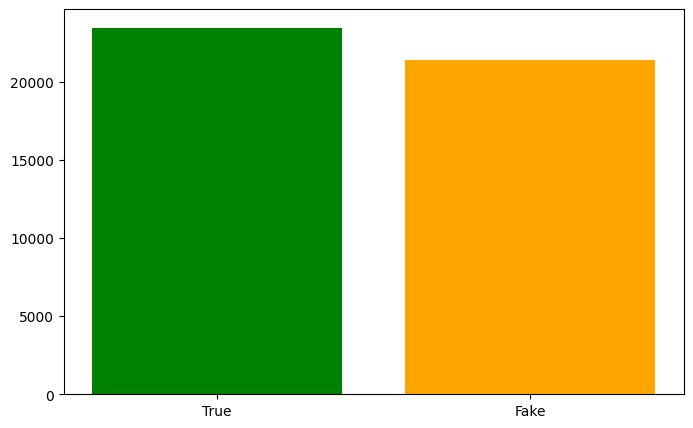

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
truth = ["True", "Fake"]
counts = [df['label'].value_counts().iloc[0], df['label'].value_counts().iloc[1]]
colors = ["green", "orange"]
plt.bar(truth, counts, color=colors)
plt.savefig('../reports/figures/fake-real-bar.png', dpi=300)
plt.show()

# Preprocessing

In [8]:
import regex as re
def clean_text_regex(text): 
    text = re.sub(r"http\S+|www\S+|https\S+", " ", text)   # remove URLs
    text = re.sub(r"@\w+|#\w+", " ", text)                 # remove mentions/hashtags
    text = re.sub(r"[^a-zA-Z]", " ", text)                 # keep only letters
    text = re.sub(r"\s+", " ", text).strip()               # remove extra spaces
    return text

In [9]:
import nltk 
from nltk.tokenize import word_tokenize 
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sheha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\sheha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [10]:
def to_lowercase(tokens): 
    return [word.lower() for word in tokens]

In [11]:
from nltk.corpus import stopwords 
nltk.download('stopwords') 
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sheha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
def remove_stopwords(tokens): 
    return [word for word in tokens if word not in stop_words]

In [13]:
# stemming 
from nltk.stem import PorterStemmer 
stemmer = PorterStemmer() 
def stem_words(tokens): 
    return [stemmer.stem(word) for word in tokens]

In [14]:
# lemmatization
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet') 
lemmatizer = WordNetLemmatizer() 
def lemmatize_words(tokens): 
    return [lemmatizer.lemmatize(word) for word in tokens]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sheha\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
def preprocess_text(text, stemming=False): 
    text = clean_text_regex(text) 
    tokens = word_tokenize(text) 
    tokens = to_lowercase(tokens) 
    tokens = remove_stopwords(tokens)
    if stemming:
        tokens = stem_words(tokens) 
    tokens = lemmatize_words(tokens) 
    return ' '.join(tokens)

### Train set transformation

In [16]:
X_train['transformed_text'] = X_train['text'].apply(lambda x: preprocess_text(x, stemming=False))
X_train['transformed_title'] = X_train['title'].apply(lambda x: preprocess_text(x, stemming=False))
X_train['transformed_text_title_combined'] = X_train['transformed_text'] + " " + X_train['transformed_title']
X_train.sample()

,title,text,transformed_text,transformed_title,transformed_text_title_combined
7842,WATCH PRESIDENT TRUMP’S MOST SAVAGE MOMENTS….P...,Here s a compilation of President Trump s most...,compilation president trump savage moment mean...,watch president trump savage moment plus favor...,compilation president trump savage moment mean...


In [17]:
# save cleaned X_train
X_train[['transformed_text_title_combined']].to_csv('../data/processed/splits transformed/X_train_clean.csv', index=False, encoding='utf-8', quoting=1)
X_train[['transformed_text_title_combined']].shape

(35918, 1)

### Test set transformation

In [18]:
X_test['transformed_text'] = X_test['text'].apply(lambda x: preprocess_text(x, stemming=False))
X_test['transformed_title'] = X_test['title'].apply(lambda x: preprocess_text(x, stemming=False))
X_test['transformed_text_title_combined'] = X_test['transformed_text'] + " " + X_test['transformed_title']
X_test.sample()

,title,text,transformed_text,transformed_title,transformed_text_title_combined
5139,Philippine troops kill 14 Maoist rebels in cla...,MANILA (Reuters) - Philippine soldiers have ki...,manila reuters philippine soldier killed maois...,philippine troop kill maoist rebel clash army,manila reuters philippine soldier killed maois...


In [19]:
# save cleaned X_test
X_test[['transformed_text_title_combined']].to_csv('../data/processed/splits transformed/X_test_clean.csv', index=False, encoding='utf-8', quoting=1)

# Top words

In [20]:
from collections import Counter

def get_top_words(docs, n=100):
    all_words = ' '.join(docs).split()
    word_counts = Counter(all_words)
    return word_counts.most_common(n)

top_words = get_top_words(list(X_train['transformed_text_title_combined']), 20)
for word, count in top_words:
    print(f"{word}: {count}")

trump: 118914
said: 106444
u: 62144
state: 50125
president: 46921
would: 44356
people: 34009
year: 33862
republican: 33166
one: 31718
new: 26399
obama: 25145
also: 25128
clinton: 25110
government: 24332
house: 24107
say: 23629
reuters: 23560
time: 23398
donald: 23275


C:\Users\sheha\AppData\Local\Temp\ipykernel_9176\1000126553.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


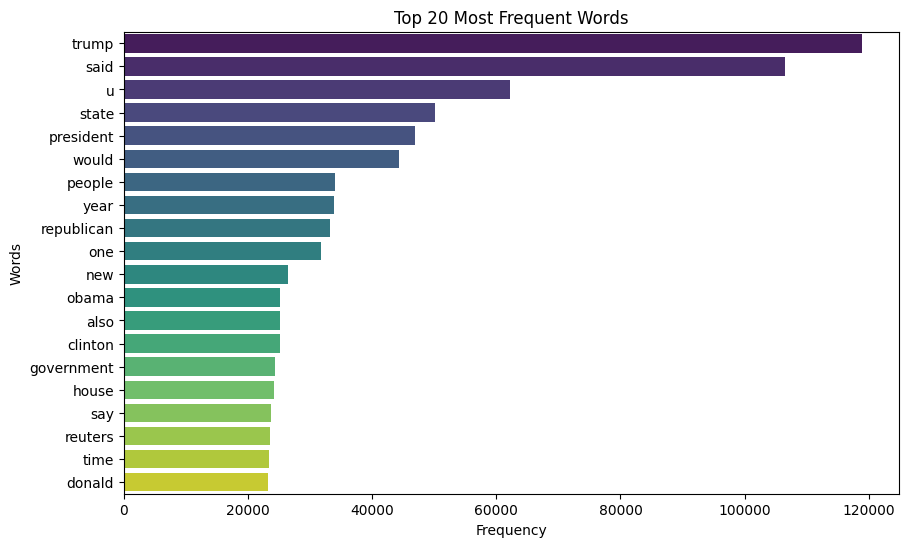

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

words, counts = zip(*top_words)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(words), palette='viridis')
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.savefig('../reports/figures/top_words.png', dpi=300)
plt.show()

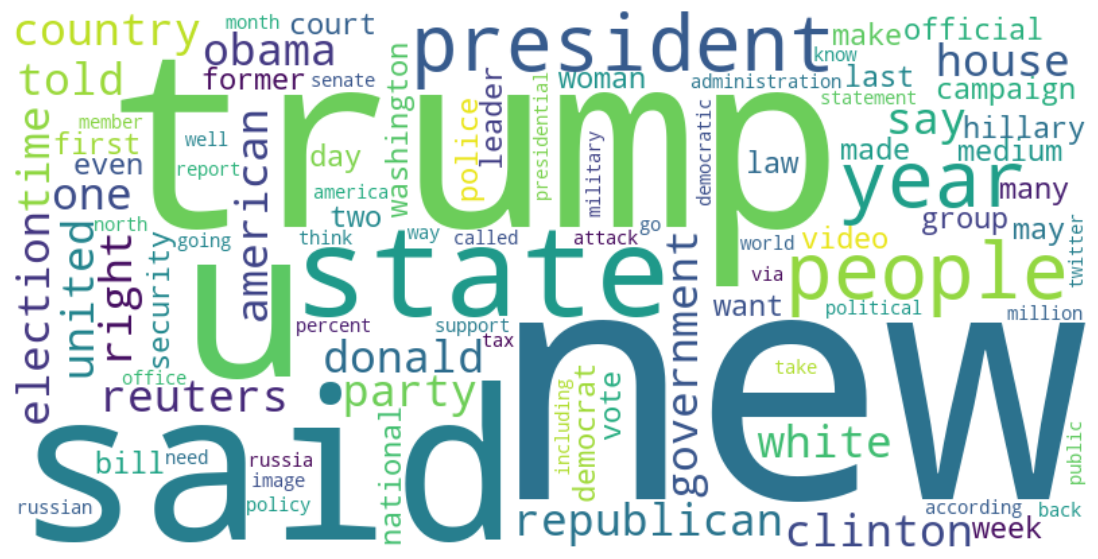

In [22]:
from wordcloud import WordCloud

top_words = get_top_words(list(X_train['transformed_text_title_combined']), 100)
words, counts = zip(*top_words)
text = " ".join(words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('../reports/figures/word_cloud.png', dpi=300)
plt.show()

# Representations

In [23]:
# BoW
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(
    min_df=5,            # ignore words in <5 docs
    max_df=0.8,          # ignore words in >80% docs
    stop_words="english")
X_bow = bow_vectorizer.fit_transform(X_train['transformed_text_title_combined'])
print("Vocabulary (first 20 words):",bow_vectorizer.get_feature_names_out()[:20])
print("shape:", X_bow.shape)

Vocabulary (first 20 words): ['aa' 'aaa' 'aal' 'aapl' 'aaron' 'aaronson' 'aarp' 'ab' 'aba' 'abaaoud'
 'ababa' 'aback' 'abadi' 'abandon' 'abandoned' 'abandoning' 'abandonment'
 'abate' 'abated' 'abating']
shape: (35918, 30645)


In [24]:
# tf-idf 
from sklearn.feature_extraction.text import TfidfVectorizer 
tfidf_vectorizer = TfidfVectorizer(
    min_df=5,            # ignore words in <5 docs
    max_df=0.8,          # ignore words in >80% docs
    stop_words="english")
X_tfidf = tfidf_vectorizer.fit_transform(X_train['transformed_text_title_combined'])
print("Vocabulary (first 20 words):", tfidf_vectorizer.get_feature_names_out()[:20])
print("Shape:", X_tfidf.shape)

Vocabulary (first 20 words): ['aa' 'aaa' 'aal' 'aapl' 'aaron' 'aaronson' 'aarp' 'ab' 'aba' 'abaaoud'
 'ababa' 'aback' 'abadi' 'abandon' 'abandoned' 'abandoning' 'abandonment'
 'abate' 'abated' 'abating']
Shape: (35918, 30645)
